# QoL index

## Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
df = pd.read_csv('dataset.csv', encoding='utf-8').drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 96 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              7440 non-null   int64  
 1   County Name                                       7440 non-null   object 
 2   Township Name                                     7440 non-null   object 
 3   Village Name                                      7440 non-null   object 
 4   c_pop_Population                                  7440 non-null   float64
 5   c_ratio_Sex Ratio                                 7440 non-null   float64
 6   c_popcal_Population Density                       7440 non-null   float64
 7   c_ratio_Dependency Ratio                          7440 non-null   float64
 8   c_ratio_Child Dependency Ratio                    7440 non-null   float64
 9   c_ratio_Elderly Dep

## Feature Selection

### job income

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = df.filter(regex='j_income')
sel = VarianceThreshold(threshold=0.028)
new = sel.fit_transform(X)
sel.get_support()
feature_selected = X.columns[(sel.get_support())]

In [ ]:
sel.variances_

array([0.01038279, 0.01384986, 0.02726969, 0.01367323, 0.02880693,
       0.00249127, 0.01040298, 0.01128885])

In [ ]:
feature_selected

Index(['j_income_Comprehensive Income Q3'], dtype='object')

In [67]:
for i in range(105,110):
    a = df.iloc[:, 6:55].drop(columns=df.iloc[:,29:37].columns).drop(columns=['c_popcal_Total Number of Households', 'e_Area'])
    a['Year'] = df['Year']
    print(a[a['Year'] == i].iloc[:, ].describe())

       c_popcal_Population Density  c_ratio_Dependency Ratio  \
count                  1488.000000               1488.000000   
mean                      0.228328                  0.296732   
std                       0.189419                  0.128368   
min                       0.000000                  0.000000   
25%                       0.047463                  0.203982   
50%                       0.205977                  0.283955   
75%                       0.368421                  0.367724   
max                       1.000000                  1.000000   

       c_ratio_Child Dependency Ratio  c_ratio_Elderly Dependency Ratio  \
count                     1488.000000                       1488.000000   
mean                         0.348445                          0.229189   
std                          0.118709                          0.126515   
min                          0.000000                          0.000000   
25%                          0.272316           

## QoL Calculation

Filter out the needed columns.

In [24]:
cal = df.iloc[:, 6:55].drop(columns=df.iloc[:,29:37].columns).drop(columns=['c_popcal_Total Number of Households', 'e_Area'])
cal['j_income_Comprehensive Income Q3'] = df['j_income_Comprehensive Income Q3']
cal.columns

Index(['c_popcal_Population Density', 'c_ratio_Dependency Ratio',
       'c_ratio_Child Dependency Ratio', 'c_ratio_Elderly Dependency Ratio',
       'c_ratio_Aging Index', 'c_pop_Population aged 0-14',
       'c_pop_Population aged 15-64', 'c_pop_Population aged 65 and above',
       'j_edu_15 with Doctorate Degree', 'j_edu_15 with Master Degree',
       'j_edu_15 with University Education',
       'j_edu_15 with Vocational Education',
       'j_edu_15 with Senior High School Education',
       'j_edu_15 with Junior High School Education',
       'j_edu_15 with Elementary School Education',
       'j_edu_15 with Self-Taught Education', 'j_edu_15 who are Illiterate',
       'c_marrital_15 who are Unmarried', 'c_marrital_15 who are Married',
       'c_marrital_15 who are Divorced', 'c_popcal_Natural Increase',
       'c_popcal_Social Increase', 'h_Median Housing Price with parking space',
       'h_Median Housing Price no parking space', 'ht_NO2', 'ht_PM2.5',
       'e_Water', 'e_Green'

In [25]:
w = [-1,0,0,0,0,1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
w = w[::-1]
cal['QoL'] = 0
for i in cal.columns[:-1]:
    cal[i] = cal[i]*w.pop()
    cal['QoL'] = cal['QoL']+cal[i]
    

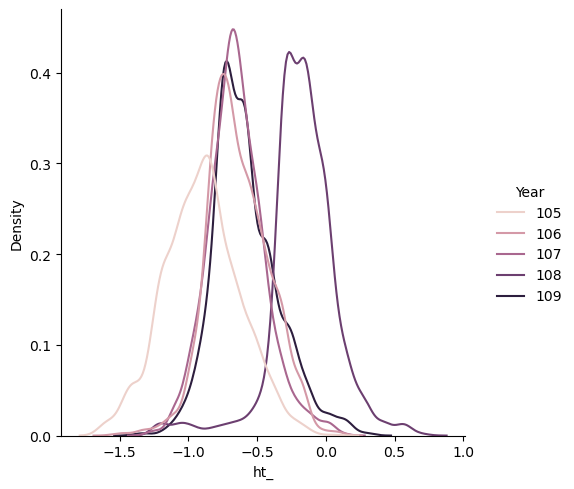

In [82]:
sns.displot(data=cal2, x='ht_', hue="Year", kind="kde")        

In [28]:
cal['QoL__4']= pd.qcut(cal['QoL'], q=4, labels=[1, 2, 3, 4])
cal['QoL__5']= pd.qcut(cal['QoL'], q=5, labels=[1, 2, 3, 4, 5])

flt = ['c_', 'j_', 'ht_', 's_', 'cs_', 'e_', 'h_']
for j in flt:
    print(cal.filter(regex='^'+j).columns)
    cal[j] = cal.filter(regex='^'+j).sum(axis=1)
    try:
        cal[j+'_4']= pd.qcut(cal[j], q=4, labels=[1, 2, 3, 4])
        cal[j+'_5']= pd.qcut(cal[j], q=5, labels=[1, 2, 3, 4, 5])
    except:
        continue
cal    

Index(['c_popcal_Population Density', 'c_ratio_Dependency Ratio',
       'c_ratio_Child Dependency Ratio', 'c_ratio_Elderly Dependency Ratio',
       'c_ratio_Aging Index', 'c_pop_Population aged 0-14',
       'c_pop_Population aged 15-64', 'c_pop_Population aged 65 and above',
       'c_marrital_15 who are Unmarried', 'c_marrital_15 who are Married',
       'c_marrital_15 who are Divorced', 'c_popcal_Natural Increase',
       'c_popcal_Social Increase'],
      dtype='object')
Index(['j_edu_15 with Doctorate Degree', 'j_edu_15 with Master Degree',
       'j_edu_15 with University Education',
       'j_edu_15 with Vocational Education',
       'j_edu_15 with Senior High School Education',
       'j_edu_15 with Junior High School Education',
       'j_edu_15 with Elementary School Education',
       'j_edu_15 with Self-Taught Education', 'j_edu_15 who are Illiterate',
       'j_income_Comprehensive Income Q3'],
      dtype='object')
Index(['ht_NO2', 'ht_PM2.5', 'ht_Hospital'], dtype='obj

,c_popcal_Population Density,c_ratio_Dependency Ratio,c_ratio_Child Dependency Ratio,c_ratio_Elderly Dependency Ratio,c_ratio_Aging Index,c_pop_Population aged 0-14,c_pop_Population aged 15-64,c_pop_Population aged 65 and above,j_edu_15 with Doctorate Degree,j_edu_15 with Master Degree,...,s_,s__4,s__5,cs_,cs__4,cs__5,e_,h_,h__4,h__5
0,-0.083230,0.0,0.0,0.0,0.0,0.006023,0.007255,-0.014348,0.000000,0.006424,...,2.000000,2,3,2.0,2,2,1.0,-0.453356,4,5
1,-0.037859,0.0,0.0,0.0,0.0,0.102188,0.153987,-0.096957,0.027919,0.048394,...,2.003876,3,4,2.0,2,2,1.0,-0.453356,4,5
2,-0.045985,0.0,0.0,0.0,0.0,0.142542,0.262806,-0.216522,0.027919,0.059957,...,2.003876,3,4,2.0,2,2,1.0,-0.453356,4,5
3,-0.015448,0.0,0.0,0.0,0.0,0.084722,0.179346,-0.147826,0.020305,0.056103,...,1.000000,1,1,0.0,1,1,1.0,-0.453356,4,5
4,-0.000533,0.0,0.0,0.0,0.0,0.014254,0.035074,-0.077826,0.002538,0.003426,...,1.003876,2,2,0.0,1,1,1.0,-0.453356,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,-0.328391,0.0,0.0,0.0,0.0,0.145882,0.270826,-0.476768,0.068010,0.138100,...,2.139535,4,5,2.0,2,2,2.0,-1.044572,1,2
7436,-0.254758,0.0,0.0,0.0,0.0,0.146517,0.223474,-0.369697,0.103275,0.167973,...,2.306202,4,5,4.0,3,4,0.0,-1.044572,1,2
7437,-0.146360,0.0,0.0,0.0,0.0,0.113064,0.276897,-0.557071,0.068010,0.137120,...,2.465116,4,5,3.0,3,3,2.0,-1.044572,1,2
7438,-0.379055,0.0,0.0,0.0,0.0,0.185264,0.354806,-0.645960,0.090680,0.259060,...,2.379845,4,5,4.0,3,4,0.0,-1.044572,1,2


In [29]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   c_popcal_Population Density                 7440 non-null   float64 
 1   c_ratio_Dependency Ratio                    7440 non-null   float64 
 2   c_ratio_Child Dependency Ratio              7440 non-null   float64 
 3   c_ratio_Elderly Dependency Ratio            7440 non-null   float64 
 4   c_ratio_Aging Index                         7440 non-null   float64 
 5   c_pop_Population aged 0-14                  7440 non-null   float64 
 6   c_pop_Population aged 15-64                 7440 non-null   float64 
 7   c_pop_Population aged 65 and above          7440 non-null   float64 
 8   j_edu_15 with Doctorate Degree              7440 non-null   float64 
 9   j_edu_15 with Master Degree                 7440 non-null   float64 
 10  

<AxesSubplot:xlabel='QoL', ylabel='Count'>

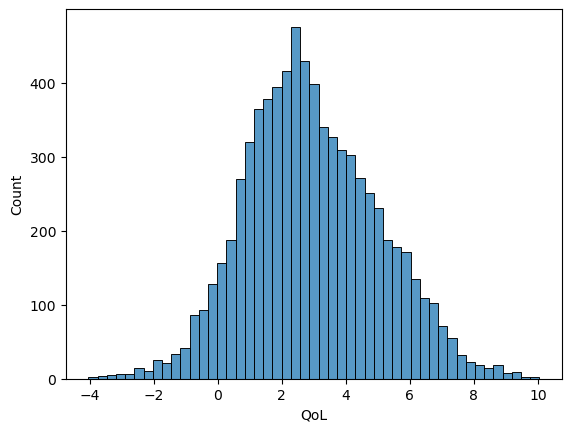

In [5]:
sns.histplot(data=cal, x="QoL")

## Read toshp

In [6]:
shp = pd.read_csv('toshp.csv', encoding='utf-8')
shp = shp.set_index(shp[['COUNTY', 'TOWN', 'VILLAGE']].apply(
        lambda x: "".join(x.astype(str)), axis=1))
shp.index.rename('index', inplace=True)

## Export

In [7]:
cal

,c_popcal_Population Density,c_ratio_Dependency Ratio,c_ratio_Child Dependency Ratio,c_ratio_Elderly Dependency Ratio,c_ratio_Aging Index,c_pop_Population aged 0-14,c_pop_Population aged 15-64,c_pop_Population aged 65 and above,j_edu_15 with Doctorate Degree,j_edu_15 with Master Degree,...,cs_trans_Metro 500 Multi,s_Fire,s_Police,cs_school_Primary,cs_school_Secondary,cs_leisure_Gym,ht_Hospital,s_Shelter,j_income_Comprehensive Income Q3,QoL
0,-0.083230,0.0,0.0,0.0,0.0,0.006023,0.007255,-0.014348,0.000000,0.006424,...,0.0,1.0,1.0,1.0,1.0,0.0,0.285714,0.000000,0.149012,4.396277
1,-0.037859,0.0,0.0,0.0,0.0,0.102188,0.153987,-0.096957,0.027919,0.048394,...,0.0,1.0,1.0,1.0,1.0,0.0,0.285714,0.003876,0.181450,3.883793
2,-0.045985,0.0,0.0,0.0,0.0,0.142542,0.262806,-0.216522,0.027919,0.059957,...,0.0,1.0,1.0,1.0,1.0,0.0,0.142857,0.003876,0.135327,2.501223
3,-0.015448,0.0,0.0,0.0,0.0,0.084722,0.179346,-0.147826,0.020305,0.056103,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.134313,0.167824
4,-0.000533,0.0,0.0,0.0,0.0,0.014254,0.035074,-0.077826,0.002538,0.003426,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.003876,0.021794,0.379178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,-0.328391,0.0,0.0,0.0,0.0,0.145882,0.270826,-0.476768,0.068010,0.138100,...,0.0,1.0,1.0,1.0,1.0,0.0,0.142857,0.139535,0.405308,2.910720
7436,-0.254758,0.0,0.0,0.0,0.0,0.146517,0.223474,-0.369697,0.103275,0.167973,...,0.0,1.0,1.0,1.0,1.0,0.0,0.285714,0.306202,0.467230,4.015726
7437,-0.146360,0.0,0.0,0.0,0.0,0.113064,0.276897,-0.557071,0.068010,0.137120,...,0.0,1.0,1.0,1.0,0.0,0.0,0.285714,0.465116,0.411339,4.099601
7438,-0.379055,0.0,0.0,0.0,0.0,0.185264,0.354806,-0.645960,0.090680,0.259060,...,0.0,1.0,1.0,1.0,1.0,0.0,0.285714,0.379845,0.439083,2.862512


In [8]:
df

,Year,County Name,Township Name,Village Name,c_pop_Population,c_ratio_Sex Ratio,c_popcal_Population Density,c_ratio_Dependency Ratio,c_ratio_Child Dependency Ratio,c_ratio_Elderly Dependency Ratio,...,Township Name_中正區,Township Name_信義區,Township Name_內湖區,Township Name_北投區,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區
0,107,新北市,三峽區,三峽里,0.007265,0.712531,0.083230,0.477214,0.326872,0.417373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,新北市,三峽區,中埔里,0.136790,0.272492,0.037859,0.146518,0.420605,0.039528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,107,新北市,三峽區,中正里,0.231977,0.302230,0.045985,0.126053,0.327934,0.077562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,107,新北市,三峽區,二鬮里,0.155473,0.322487,0.015448,0.092347,0.268455,0.082212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,107,新北市,三峽區,五寮里,0.034425,0.479474,0.000533,0.392089,0.194105,0.418369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,106,臺北市,萬華區,錦德里,0.261979,0.264683,0.328391,0.327858,0.363030,0.281320,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7436,106,臺北市,萬華區,雙園里,0.219640,0.299177,0.254758,0.364323,0.457722,0.258464,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7437,106,臺北市,萬華區,青山里,0.266348,0.288468,0.146360,0.315046,0.255268,0.337343,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7438,106,臺北市,萬華區,頂碩里,0.344054,0.321272,0.379055,0.332622,0.351294,0.293865,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
qol = df.iloc[:,:4].join(cal.iloc[:,40:])
qol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year           7440 non-null   int64   
 1   County Name    7440 non-null   object  
 2   Township Name  7440 non-null   object  
 3   Village Name   7440 non-null   object  
 4   QoL            7440 non-null   float64 
 5   QoL__4         7440 non-null   category
 6   QoL__5         7440 non-null   category
 7   c_             7440 non-null   float64 
 8   c__4           7440 non-null   category
 9   c__5           7440 non-null   category
 10  j_             7440 non-null   float64 
 11  j__4           7440 non-null   category
 12  j__5           7440 non-null   category
 13  ht_            7440 non-null   float64 
 14  ht__4          7440 non-null   category
 15  ht__5          7440 non-null   category
 16  s_             7440 non-null   float64 
 17  s__4           7440 non-null   ca

In [31]:
qol = qol.set_index(qol[['County Name', 'Township Name', 'Village Name']].apply(
        lambda x: "".join(x.astype(str)), axis=1))
qol.index.rename('index', inplace=True)


In [32]:
qol = qol.join(shp['V_ID'], on='index')
qol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7440 entries, 新北市三峽區三峽里 to 臺北市萬華區騰雲里
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year           7440 non-null   int64   
 1   County Name    7440 non-null   object  
 2   Township Name  7440 non-null   object  
 3   Village Name   7440 non-null   object  
 4   QoL            7440 non-null   float64 
 5   QoL__4         7440 non-null   category
 6   QoL__5         7440 non-null   category
 7   c_             7440 non-null   float64 
 8   c__4           7440 non-null   category
 9   c__5           7440 non-null   category
 10  j_             7440 non-null   float64 
 11  j__4           7440 non-null   category
 12  j__5           7440 non-null   category
 13  ht_            7440 non-null   float64 
 14  ht__4          7440 non-null   category
 15  ht__5          7440 non-null   category
 16  s_             7440 non-null   float64 
 17  s__4           7440 non-n

In [49]:
for i in range(105, 110):
    if i == 105:
        exp = qol[qol['Year'] == 105].copy()  
        exp.columns = [str(i) + '|' + col for col in exp.columns]  
        print(exp.columns)
    else:
        col_names = [str(i) + '|' + col for col in qol.iloc[:, 4:-1].columns]
        exp_cols = qol[qol['Year'] == i].iloc[:, 4:-1].values
        exp[col_names] = exp_cols 

    
exp.iloc[:, 4:].set_index('105|V_ID').to_csv('qol_all.csv')

Index(['105|Year', '105|County Name', '105|Township Name', '105|Village Name',
       '105|QoL', '105|QoL__4', '105|QoL__5', '105|c_', '105|c__4', '105|c__5',
       '105|j_', '105|j__4', '105|j__5', '105|ht_', '105|ht__4', '105|ht__5',
       '105|s_', '105|s__4', '105|s__5', '105|cs_', '105|cs__4', '105|cs__5',
       '105|e_', '105|h_', '105|h__4', '105|h__5', '105|V_ID'],
      dtype='object')


In [71]:
exp.filter(regex='c__4').describe()

,106|c__4,107|c__4,108|c__4,109|c__4
count,1488.000000,1488.000000,1488.000000,1488.000000
mean,3.218414,1.973118,1.952957,2.025538
std,0.899082,0.900170,0.957295,1.004706
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000
50%,3.500000,2.000000,2.000000,2.000000
75%,4.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000


In [52]:
a = exp.filter(regex='__').columns

In [64]:
flt = ['c_', 'j_', 'ht_', 's_', 'cs_', 'e_', 'h_']
for i in flt:
    print(str(list(exp.filter(regex=i+'_4').columns))[1:-1]+',')
for i in flt:
    print(str(list(exp.filter(regex=i+'_5').columns))[1:-1]+',')
print(str(list(exp.filter(regex='QoL__4').columns))[1:-1]+',')
print(str(list(exp.filter(regex='QoL__5').columns))[1:-1]+',')
print(str(list(exp.filter(regex='e_').columns))[1:-1]+',')


'105|c__4', '106|c__4', '107|c__4', '108|c__4', '109|c__4',
'105|j__4', '106|j__4', '107|j__4', '108|j__4', '109|j__4',
'105|ht__4', '106|ht__4', '107|ht__4', '108|ht__4', '109|ht__4',
'105|s__4', '105|cs__4', '106|s__4', '106|cs__4', '107|s__4', '107|cs__4', '108|s__4', '108|cs__4', '109|s__4', '109|cs__4',
'105|cs__4', '106|cs__4', '107|cs__4', '108|cs__4', '109|cs__4',
,
'105|h__4', '106|h__4', '107|h__4', '108|h__4', '109|h__4',
'105|c__5', '106|c__5', '107|c__5', '108|c__5', '109|c__5',
'105|j__5', '106|j__5', '107|j__5', '108|j__5', '109|j__5',
'105|ht__5', '106|ht__5', '107|ht__5', '108|ht__5', '109|ht__5',
'105|s__5', '105|cs__5', '106|s__5', '106|cs__5', '107|s__5', '107|cs__5', '108|s__5', '108|cs__5', '109|s__5', '109|cs__5',
'105|cs__5', '106|cs__5', '107|cs__5', '108|cs__5', '109|cs__5',
,
'105|h__5', '106|h__5', '107|h__5', '108|h__5', '109|h__5',
'105|QoL__4', '106|QoL__4', '107|QoL__4', '108|QoL__4', '109|QoL__4',
'105|QoL__5', '106|QoL__5', '107|QoL__5', '108|QoL__5', 